<a href="https://colab.research.google.com/github/TosinFrancis/BankUsers/blob/main/BankChunner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/BankChurners.csv')

In [ ]:
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
train = data.sample(10000)
test = data.sample(1027)

test.to_csv('TestData')

In [ ]:
cat = train.select_dtypes(include = ['category', 'object'])
num = train.select_dtypes(include = 'number')

In [ ]:
display(cat.head(3))
display(num.head(3))

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
8250,Existing Customer,M,Graduate,Married,$120K +,Blue
335,Existing Customer,M,High School,Married,$120K +,Blue
438,Existing Customer,M,Doctorate,Divorced,$60K - $80K,Blue


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8250,709790058,53,4,40,1,1,3,6383.0,1512,4871.0,0.558,4985,87,0.776,0.237
335,715024233,53,1,36,6,3,2,3312.0,1844,1468.0,0.986,1740,32,0.882,0.557
438,721333233,40,4,34,4,2,3,23138.0,1727,21411.0,0.693,1612,39,1.438,0.075


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
norm = MinMaxScaler()


for i in train.columns:
    if train[i].dtypes == 'int' or train[i].dtypes == 'float':
        train[[i]] = scaler.fit_transform(train[[i]])

train.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8250,-0.795483,Existing Customer,0.833409,M,1.271077,Graduate,Married,$120K +,Blue,0.510233,...,-1.328286,0.492233,-0.247464,0.428835,-0.285847,-0.924498,0.168788,0.942096,0.269918,-0.137006
335,-0.653732,Existing Customer,0.833409,M,-1.039132,High School,Married,$120K +,Blue,0.008923,...,0.651423,-0.411278,-0.585317,0.835962,-0.660109,1.037396,-0.784235,-1.399456,0.716086,1.023504
438,-0.482874,Existing Customer,-0.788956,M,1.271077,Doctorate,Divorced,$60K - $80K,Blue,-0.241731,...,-0.338431,0.492233,1.595820,0.692486,1.533220,-0.305676,-0.821827,-1.101440,3.056361,-0.724514
1571,-0.672059,Existing Customer,-1.412942,M,-0.269062,Uneducated,Single,$60K - $80K,Blue,-1.870987,...,0.651423,0.492233,-0.095315,0.141884,-0.108010,0.212301,-0.583645,0.388638,-0.433007,-0.398120
8693,-0.479829,Existing Customer,0.708611,F,-0.269062,Post-Graduate,Single,Less than $40K,Blue,-0.241731,...,0.651423,0.492233,-0.260445,0.631172,-0.316972,0.042698,1.101841,1.027243,-0.517189,-0.024581


In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()



for i in train.columns:
    if train[i].dtypes == 'O':
        train[i]= lb.fit_transform(train[i])

train.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8250,-0.795483,1,0.833409,1,1.271077,2,1,0,0,0.510233,...,-1.328286,0.492233,-0.247464,0.428835,-0.285847,-0.924498,0.168788,0.942096,0.269918,-0.137006
335,-0.653732,1,0.833409,1,-1.039132,3,1,0,0,0.008923,...,0.651423,-0.411278,-0.585317,0.835962,-0.660109,1.037396,-0.784235,-1.399456,0.716086,1.023504
438,-0.482874,1,-0.788956,1,1.271077,1,0,2,0,-0.241731,...,-0.338431,0.492233,1.595820,0.692486,1.533220,-0.305676,-0.821827,-1.101440,3.056361,-0.724514
1571,-0.672059,1,-1.412942,1,-0.269062,5,2,2,0,-1.870987,...,0.651423,0.492233,-0.095315,0.141884,-0.108010,0.212301,-0.583645,0.388638,-0.433007,-0.398120
8693,-0.479829,1,0.708611,0,-0.269062,4,2,4,0,-0.241731,...,0.651423,0.492233,-0.260445,0.631172,-0.316972,0.042698,1.101841,1.027243,-0.517189,-0.024581


In [ ]:
# ANOVA F-value between label/feature
x = train.drop('Attrition_Flag', axis = 1)
y = train.Attrition_Flag

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_cols = SelectKBest(score_func = f_classif, k = 'all' )
model  = best_cols.fit(x, y)
score = pd.DataFrame(model.scores_)
columns = pd.DataFrame(x.columns)
score_board = pd.concat([columns, score], axis = 1)
score_board.columns = ['Features', 'F_classif_score']
k1 = score_board.nlargest(11, 'F_classif_score')

k1.sort_values(by = 'F_classif_score', ascending = False)

,Features,F_classif_score
17,Total_Trans_Ct,1603.377860
18,Total_Ct_Chng_Q4_Q1,915.051461
13,Total_Revolving_Bal,746.251072
11,Contacts_Count_12_mon,441.053035
19,Avg_Utilization_Ratio,330.373955
16,Total_Trans_Amt,292.750296
10,Months_Inactive_12_mon,235.359212
9,Total_Relationship_Count,232.055371
15,Total_Amt_Chng_Q4_Q1,172.910721
0,CLIENTNUM,21.998543


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

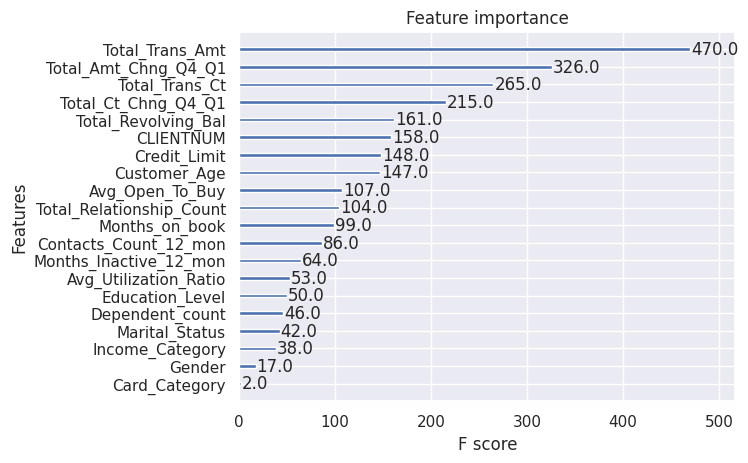

In [ ]:
#-XGBOOST
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)

In [ ]:
sel_cols = ['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'CLIENTNUM']

In [ ]:
x = train[sel_cols]
y = train.Attrition_Flag

x.head()

,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Total_Trans_Amt,Total_Amt_Chng_Q4_Q1,CLIENTNUM
8250,0.942096,0.269918,0.168788,-0.924498,-0.795483
335,-1.399456,0.716086,-0.784235,1.037396,-0.653732
438,-1.101440,3.056361,-0.821827,-0.305676,-0.482874
1571,0.388638,-0.433007,-0.583645,0.212301,-0.672059
8693,1.027243,-0.517189,1.101841,0.042698,-0.479829


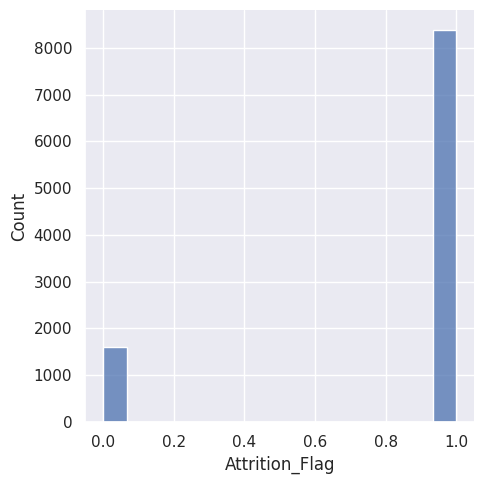

In [ ]:
sns.displot(train.Attrition_Flag)

In [ ]:
from collections import Counter
# summarize the old class distribution
counter = Counter(y)
print(counter)
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)


Counter({1: 8387, 0: 1613})
Counter({1: 8387, 0: 8387})


In [ ]:
x.shape

(16774, 5)

In [ ]:
y.shape

(16774,)

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 40, stratify = y)


              precision    recall  f1-score   support

           0       0.84      0.81      0.82      6961
           1       0.80      0.83      0.81      6458

    accuracy                           0.82     13419
   macro avg       0.82      0.82      0.82     13419
weighted avg       0.82      0.82      0.82     13419



<Axes: >

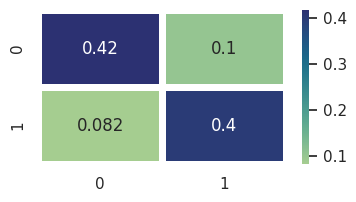

In [ ]:
#classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

log_reg = LogisticRegression()
log_reg.fit(xtrain, ytrain)
train_pred = log_reg.predict(xtrain)
print(classification_report(train_pred, ytrain))

revealer = confusion_matrix(train_pred, ytrain)
plt.figure(figsize = (4, 2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot = True, cmap = 'crest', linewidth = 5)

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1771
           1       0.79      0.84      0.81      1584

    accuracy                           0.82      3355
   macro avg       0.82      0.82      0.82      3355
weighted avg       0.82      0.82      0.82      3355



<Axes: >

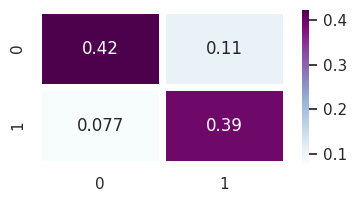

In [ ]:
#tryimg on the test data
test_pred = log_reg.predict(xtest)
print(classification_report(test_pred, ytest))

revealer_ = confusion_matrix(test_pred, ytest)
plt.figure(figsize = (4, 2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer_/np.sum(revealer_), annot = True, cmap = 'BuPu', linewidth = 5)

In [ ]:
# importing the test and carrying out the same process on it.
test_data = pd.read_csv('/content/TestData')
test_data.head(2)

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,4794,711883833,Existing Customer,50,F,1,Uneducated,Single,Less than $40K,Blue,...,1,1,1837.0,665,1172.0,0.844,4752,88,0.66,0.362
1,2478,770262183,Existing Customer,31,M,0,Uneducated,Single,Less than $40K,Blue,...,2,2,5715.0,1741,3974.0,0.816,2324,67,1.03,0.305


In [ ]:
for i in test_data.columns:
    if test_data[i].dtypes == 'int' or test_data[i].dtypes == 'float':
        test_data[[i]] = scaler.fit_transform(test_data[[i]])

for i in test_data.columns:
    if test_data[i].dtypes == 'O':
        test_data[i] = lb.fit_transform(test_data[i])

test_data.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.107881,-0.732432,1,0.460052,0,-1.015623,5,2,4,0,...,-1.349097,-1.297353,-0.762157,-0.588546,-0.710369,0.404140,0.145147,1.030654,-0.222533,0.352203
1,-0.918472,0.851657,1,-1.908550,1,-1.791697,5,2,4,0,...,-0.344367,-0.400127,-0.334548,0.708304,-0.400508,0.277168,-0.626269,0.092601,1.404221,0.146646
2,-0.724574,1.106277,1,0.335389,1,0.536527,2,2,2,0,...,-1.349097,1.394327,-0.175876,0.384091,-0.211628,1.120622,-0.218638,-0.264753,0.107214,-0.210375
3,-1.173969,-0.738991,1,-2.033213,0,-1.015623,5,1,5,0,...,-0.344367,-0.400127,-0.521889,-0.284823,-0.497271,2.227088,-0.547475,-1.336814,-0.525901,-0.131037
4,-0.233179,0.877216,1,-1.285234,0,-0.239548,5,2,5,0,...,-1.349097,-2.194580,-0.749256,0.030953,-0.754272,0.508438,-0.126818,0.092601,0.032472,1.221314


In [ ]:
sel_cols = ['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'CLIENTNUM']
test_data_x = test_data[sel_cols]
test_data_y = test_data['Attrition_Flag']

              precision    recall  f1-score   support

           0       0.84      0.45      0.58       316
           1       0.80      0.96      0.87       711

    accuracy                           0.80      1027
   macro avg       0.82      0.70      0.73      1027
weighted avg       0.81      0.80      0.78      1027



<Axes: >

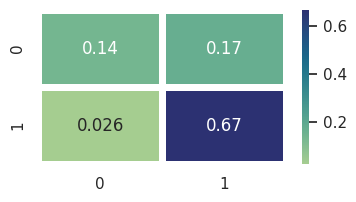

In [ ]:
new_pred = log_reg.predict(test_data_x)
print(classification_report(new_pred, test_data_y))

revealer = confusion_matrix(new_pred, test_data_y)
plt.figure(figsize = (4, 2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot = True, cmap = 'crest', linewidths= 5)